# Pavankumar kamble

# crime_data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy .spatial.distance import cdist
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'D:\data science\data science assg\assg.7 clustering\crime_data.csv')

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


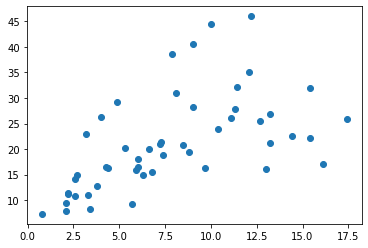

In [6]:
plt.scatter(df['Murder'],df['Rape'])

In [7]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [8]:
df_norm = norm_func(df.iloc[:,1:])

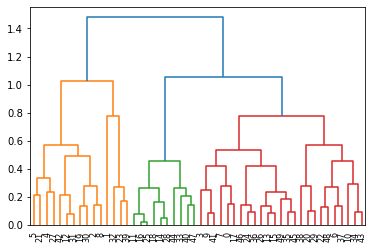

In [9]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [10]:
pa = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [11]:
pa

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [12]:
y_pa = pa.fit_predict(df_norm)
Clusters=pd.DataFrame(y_pa,columns=['Clusters'])

In [13]:
df_norm['h_clusterid'] = pa.labels_
df_norm.iloc[:,:4].groupby(df_norm.h_clusterid).mean()

,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,
0,0.820205,0.241525,0.458656,0
1,0.352877,0.636610,0.314212,1
2,0.117808,0.276271,0.111370,2
3,0.750311,0.798151,0.654217,3


In [14]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(df_norm['h_clusterid'],pa.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        11

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



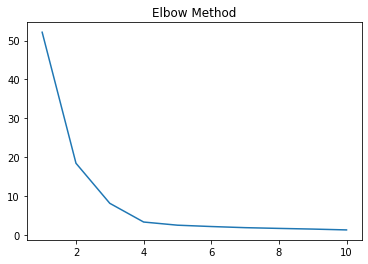

In [15]:
wcss=[]
for i in range (1,11):
    Kmean = KMeans(n_clusters=i,random_state= 0)
    Kmean.fit(df_norm)
    wcss.append(Kmean.inertia_)
plt.plot(range(1,11),wcss)
plt.title ('Elbow Method')
plt.show()

In [16]:
model = KMeans(4,random_state=42)
model.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [17]:
model.labels_

array([1, 3, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0,
       1, 3, 1, 2, 1, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 1, 0, 1,
       2, 1, 1, 2, 1, 1])

In [18]:
df['cluster_new']=model.labels_

In [19]:
df.groupby('cluster_new').agg(['mean']).reset_index()

,cluster_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.054545,264.090909,79.090909,32.618182
1,1,7.084000,148.040000,69.560000,19.460000
2,2,3.720000,79.400000,48.300000,11.610000
3,3,13.375000,284.500000,46.250000,25.050000
